## By: <font color='violet'>Sarah Saeed</font> , <font color='blue'>Moemen Mohamed</font> 


#  <font color='black'>why data scaling matters?</font> 
in some machine learning algorithms, if the values of the features are close to each other, there are chances for the algorithm to get trained well and faster instead of data set where the values of the features hava high differences with each other, in this case, the understanding of the data will take more time to understand and the accuracy will be lower. 

in simple words, **scaling is used for making data points generalized so that the distance between them will be lower.**

## Is it necessary for all Algorithms?
Actually No, but most basic algorithms like linear and logistic regression, artificial neural networks, clustering algorithms with k value..etc, face the effect of the difference in scale for input variables. **Take a look at the formula for gradient descent below:**
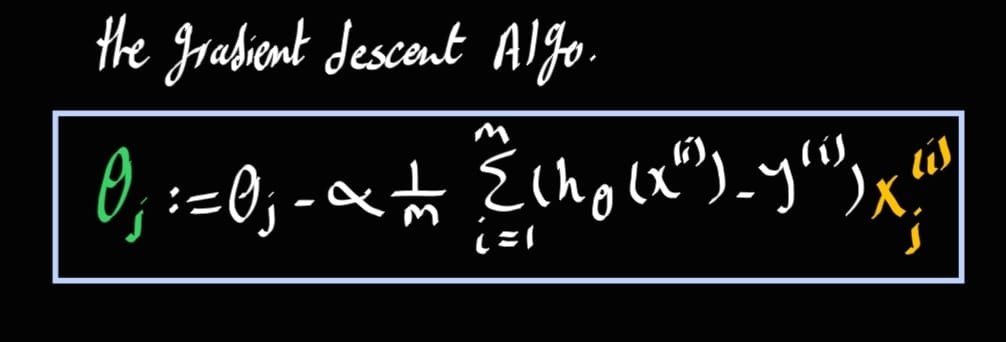

The presence of feature value X in the formula will affect the step size of the gradient descent. The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

**in simpler words**:Having features on a similar scale can help the gradient descent converge more quickly towards the minima.


 

## didn't get it?! see this one:
Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

For example, let’s say we have data containing high school GPA scores of students and their future incomes (in thousands Rupees)




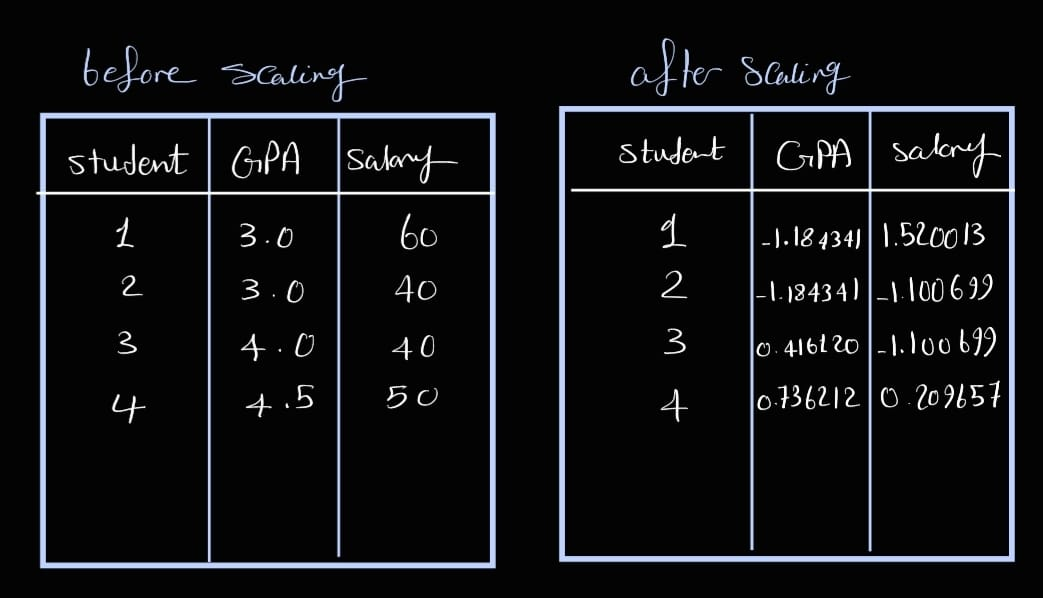

Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, **we do not want our algorithm to be biassed towards one feature.**

Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.
The effect of scaling is conspicuous when we compare the **Euclidean distance** between data points for students A and B, and between B and C, before and after scaling as shown below:





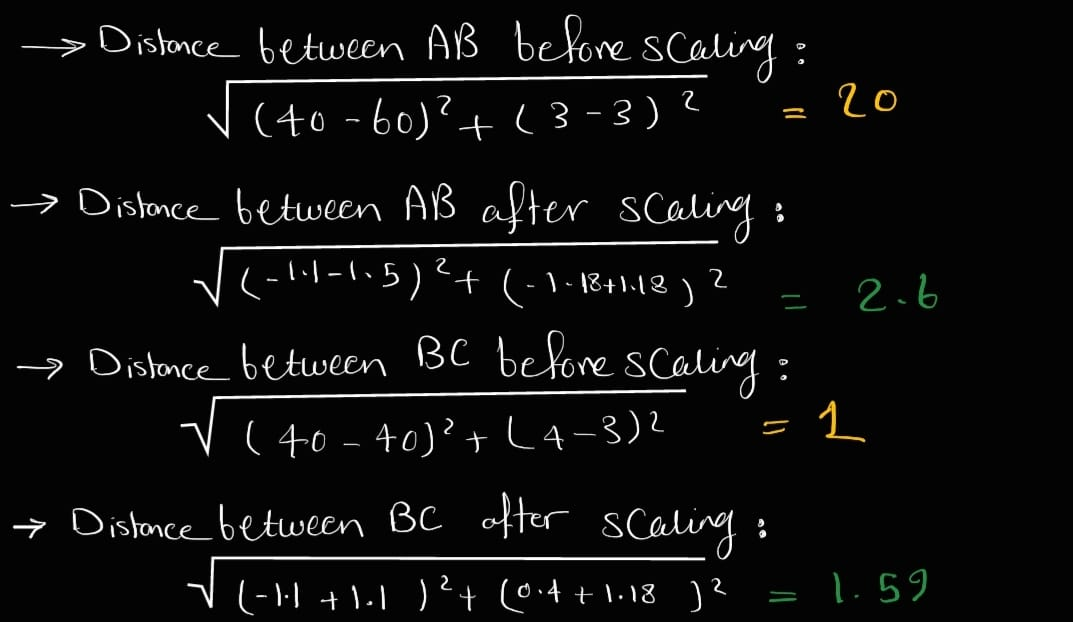

As we can see, the distance beteen features after scaling became smaller and this is what we want.
**Now**, i think you got why we should scale our dataset before using any distance based algorithm.

**Normalization and Standardization** are the two main methods for the scaling of the data. Which are widely used in the algorithms where scaling is required.
 ## Now let's take a closer look to normalization and standarization

# 1- <font color='black'>Normalization</font> 
What we want to do here is working on a feature to make it's minimum value **0** and  maximum value **1**, as we want to make values of features close to each other.

Basically, under the operation of normalization, the difference between any value and the minimum value gets divided by the difference of the maximum and minimum values. We can represent the normalization as following:

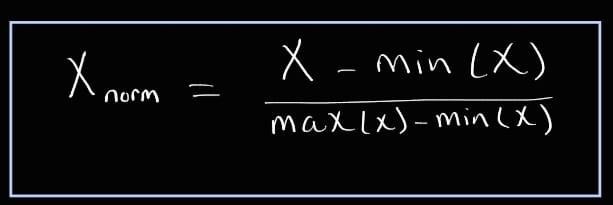




## <font color='green'>Normalization using the scikit-learn object</font> <font color='violet'>MinMaxScaler</font> 
### This is how it goes:
- Fit the scaler using available training data and this is used for calculating the **min** and **max** values, this is done by the funcion **fit()** 
- apply the scale to your training data to be normalized, this is done by using **transform()** function 
- here's the transformation explained:

**X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))**

**X_scaled = X_std * (max - min) + min**

*where min, max = feature_range.*

*note that*:This transformation is often used as an alternative to zero mean, unit variance scaling.


**here's a simple example:**

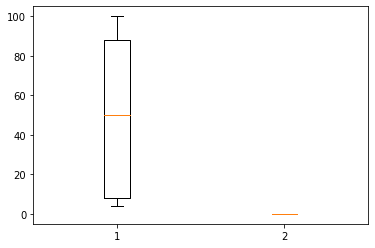

[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.array([[100, 0.001],
                 [8, 0.05],
                 [50, 0.005],
                 [88, 0.07],
                 [4, 0.1]])
plt.boxplot(data)
plt.show()
#make an object from the MinMaxScaler
scaler=MinMaxScaler()
#fit and transform your data
scaledd=scaler.fit_transform(data)
print(scaledd)

as you can see above, the values of the features are ranging between **0** and **1**
### now let's visualize the scaled data

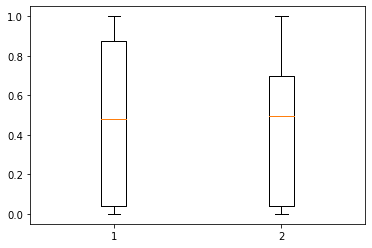

In [33]:
plt.boxplot(scaledd)
plt.show()

# 2- <font color='black'>Standarization</font> 
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

a value is standarized as following:

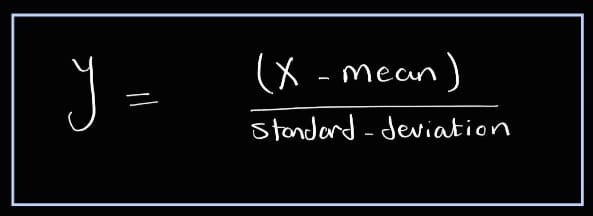

## <font color='green'>Standarization using the scikit-learn object</font> <font color='violet'>StandardScaler</font> 
### This is how it goes:
- same functions will be used as in normalization, but we will work with the standardScaler object.
- we can calculate the **mean** and the **standard deviation** for each column after standarization to make sure that: mean=0,std=1.

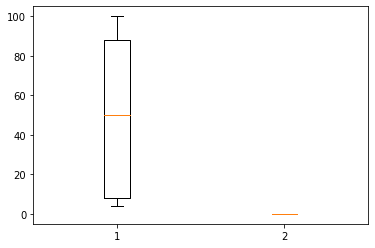

[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = np.array([[100, 0.001],
                 [8, 0.05],
                 [50, 0.005],
                 [88, 0.07],
                 [4, 0.1]])
plt.boxplot(data)
plt.show()
#make an object from the MinMaxScaler
scaler=StandardScaler()
#fit and transform your data
scaled=scaler.fit_transform(data)
print(scaled)


### let's visualize the scaled data

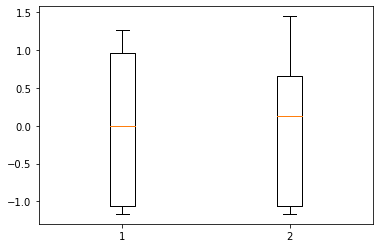

In [45]:
plt.boxplot(scaled)
plt.show()

# working  with real world datasets
### We will work on **The sonar dataset**, it's a standard machine learning dataset for binary classification. 
- we will start with importing the dataset and print a summary for its values

In [13]:
from pandas import read_csv
import matplotlib.pyplot as plt
dataset=read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv",header=None)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [14]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


## <font color='violet'>normalizing the dataset</font>

In [82]:
from pandas import DataFrame
# perform a robust scaler transform of the dataset
trans1= MinMaxScaler()
scaled_dataset1 = trans1.fit_transform(dataset)
# convert the array back to a dataframe
scaled_dataset1 = DataFrame(scaled_dataset1)
# summarize
print(scaled_dataset1.describe())


               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.204011    0.162180    0.139068    0.114342    0.173732    0.253615   
std      0.169550    0.141277    0.126242    0.110623    0.140888    0.158843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087389    0.067938    0.057326    0.044163    0.079508    0.152714   
50%      0.157080    0.129447    0.107753    0.090942    0.141517    0.220236   
75%      0.251106    0.202958    0.185447    0.139563    0.237319    0.333042   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          49  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.320472    0.285114    0.252485    0.281652  ...    0.247564   
std      0.167175    0.187767    0.175311    0.1

### as you can see above, the max=1, and the  min=0 for all columns

## <font color='violet'>standarizing the dataset</font>

In [81]:
# perform a robust scaler transform of the dataset
trans2 = StandardScaler()
scaled_dataset2 = trans2.fit_transform(dataset)
# convert the array back to a dataframe
scaled_dataset2 = DataFrame(scaled_dataset2)
# summarize
print(scaled_dataset2.describe())



                 0             1             2             3             4   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean  -3.936488e-17 -5.511083e-17 -1.030159e-16 -5.604491e-17 -3.202566e-18   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00   
min   -1.206158e+00 -1.150725e+00 -1.104253e+00 -1.036115e+00 -1.236093e+00   
25%   -6.894939e-01 -6.686781e-01 -6.490624e-01 -6.359298e-01 -6.703975e-01   
50%   -2.774703e-01 -2.322506e-01 -2.486515e-01 -2.120457e-01 -2.292089e-01   
75%    2.784345e-01  2.893335e-01  3.682681e-01  2.285353e-01  4.524231e-01   
max    4.706053e+00  5.944643e+00  6.836142e+00  8.025419e+00  5.878863e+00   

                 5             6             7             8             9   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean  -5.764620e-17  8.913810e-17 -9.731131e-17  2.068324e-18 -6.111564e-17   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.

### We can see that the distributions have been adjusted and that the mean is a very small number close to zero and the standard deviation is very close to 1.0 for each variable